In [1]:
#test_3 automate everything

In [2]:
#csv ->
#   Stock_Open  Stock_close  avg_compound

#For weekends ->
#   Stock_Open(last_weekday)  Stock_close(last_weekday)  avg_compound(weekend_values)

In [3]:
import requests
import pandas as pd
from io import StringIO

class StockData:
    def __init__(self, stock_name):
        self.stock_name = stock_name

    def stock_data(self):
        api_key = "COOFAIV9AV9SVV19"
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol={self.stock_name}&apikey={api_key}&datatype=csv'
        r = requests.get(url)
        return r.text

sd = StockData("NVDA")
data1 = sd.stock_data()
df = pd.read_csv(StringIO(data1))

print(df.head())
print(len(df['close']))

    timestamp     open      high     low   close     volume
0  2024-10-01  121.765  122.4351  115.79  117.00  302094485
1  2024-09-30  118.310  121.5000  118.15  121.44  227053651
2  2024-09-27  123.970  124.0300  119.26  121.40  271009175
3  2024-09-26  126.800  127.6650  121.80  124.04  302582868
4  2024-09-25  122.020  124.9400  121.61  123.51  284692948
6269


In [4]:
df['close']

0       117.00
1       121.44
2       121.40
3       124.04
4       123.51
         ...  
6264     28.25
6265     29.19
6266     27.44
6267     25.00
6268     23.50
Name: close, Length: 6269, dtype: float64

In [5]:
import datetime
from datetime import date, datetime, timedelta

now = date.today()
print(now)

2024-10-02


In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
import requests
import csv
from io import StringIO
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

class NewsScraper:
    analyzer = SentimentIntensityAnalyzer()
    avg_compound = []
    epub_date = []

    def __init__(self, api_key, total_days):
        self.api_key = api_key
        self.total_days = total_days
        self.now = datetime.now()

    def scrape_news(self):
        c=0
        for i in range(self.total_days):
            avg = 0
            epub_date_day = []

            date = (self.now - timedelta(days=i)).strftime('%Y-%m-%d')
            url = f'https://content.guardianapis.com/search?section=business&page-size=200&from-date={date}&to-date={date}&show-fields=body&api-key={self.api_key}'

            try:
                response = requests.get(url)
                data = response.json()
            except requests.exceptions.RequestException as e:
                print(f"Error requesting API: {e}")
                continue

            if 'response' not in data or 'results' not in data.get('response', {}):
                print(f"Error: Unexpected response format. Response: {data}")
                continue

            article_content = []
            for article in data['response']['results']:
                content = article.get('fields', {}).get('body', '')
                publication_date = article.get('webPublicationDate', '')
                date_string = publication_date.split('T')[0]  # extract the date part

                # Remove HTML tags using BeautifulSoup
                soup = BeautifulSoup(content, 'html.parser')
                content = soup.get_text()

                article_content.append(content)
                epub_date_day.append(date_string)  # append the date string

            sentiment_list = []
            for article in article_content:
                temp = self.analyzer.polarity_scores(article)
                sentiment_list.append(temp)

            compound_list = []
            for i in sentiment_list:
                temp = i.get('compound')
                compound_list.append(temp)

            if compound_list:
                sum = 0
                for i in compound_list:
                    sum = sum + i

                avg = sum / (len(compound_list))

                self.avg_compound.append(avg)
                self.epub_date.append(epub_date_day[0])

            avg = 0
            article_content.clear()
            sentiment_list.clear()
            compound_list.clear()
            epub_date_day.clear()

            c=c+1
            print(c)

api_key = '1e78027b-d07c-4e35-9a0a-8f1d2b4e5549'

start_date = '2024-08-01'
current_date = str(date.today())

d1 = datetime.strptime(start_date, "%Y-%m-%d")
d2 = datetime.strptime(current_date, "%Y-%m-%d")

total_days = (d2 - d1).days

ns = NewsScraper(api_key, total_days)
ns.scrape_news()

print(ns.avg_compound)
print(ns.epub_date)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
[0.37990999999999997, 0.6753899999999999, 0.726725, 0.9843, 0.3398428571428571, 0.2905777777777778, 0.6358000000000001, 0.40343846153846147, 0.5138384615384616, -0.9667, 0.8398833333333333, 0.6566299999999999, 0.4691125, 0.3784384615384616, 0.89645, 0.7542454545454546, 0.5178222222222222, 0.45936666666666665, 0.47863750000000005, 0.4028888888888889, 0.512575, 0.4647818181818181, 0.56662, 0.4827222222222222, 0.1432571428571429, 0.5979923076923076, 0.46341333333333334, 0.46941666666666676, -0.006213333333333352, 0.8156166666666665, 0.7364875, 0.9954, 0.11041999999999999, 0.7352066666666666, 0.055769999999999986, 0.75259, 0.6109199999999999, 0.22101999999999994, 0.28932, 0.4608375, 0.2759846153846154, 0.53845, 0.6196818181818181, 0.25249166666666667, 0.09830000000000004, 0.9917499999999999, 0.34463333333333335, 0.8

In [8]:
print(len(ns.avg_compound))
print(len(ns.epub_date))

61
61


In [9]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming df (stock data) and ns (news scraper results) are already populated
# Prepare stock data (df['close']) and ensure date format
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Ensure that news dates (ns.epub_date) are datetime objects
news_dates = pd.to_datetime(ns.epub_date)

# Fill missing stock data with previous available values
stock_close_filled = df['close'].reindex(pd.date_range(start=news_dates.min(), end=news_dates.max(), freq='D'), method='ffill')

# Combine stock data with sentiment scores based on publication dates
combined_data = pd.DataFrame({'close': stock_close_filled})

# Map sentiment scores to corresponding dates
sentiment_df = pd.DataFrame({'date': news_dates, 'avg_compound': ns.avg_compound})
sentiment_df.set_index('date', inplace=True)

# Merge stock prices and sentiment scores, fill missing sentiment scores with 0
combined_data = combined_data.join(sentiment_df, how='left').fillna(0)

# Prepare input features for LSTM: close prices and sentiment scores
X = combined_data[['close', 'avg_compound']].values
y = combined_data['close'].shift(-1).fillna(method='ffill').values  # Predict the next close price

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Split data into sequences for LSTM (use a sliding window approach)
def create_sequences(X, y, time_steps=30):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 30  # Number of days to look back
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the true values to get actual price values
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error: {mse}')

2024-10-02 07:04:09.372526: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 07:04:09.391035: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 07:04:09.396784: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 07:04:10.351568: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_2103/1832048362.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = combined_data['close'].shift(-1).fillna(method='ffill').values  

Epoch 1/50


I0000 00:00:1727852652.668583    2103 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-02 07:04:12.674917: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2997 - val_loss: 0.4117
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2151 - val_loss: 0.3100
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1395 - val_loss: 0.2213
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0920 - val_loss: 0.1453
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0659 - val_loss: 0.0833
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0514 - val_loss: 0.0403
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0594 - val_loss: 0.0216
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0626 - val_loss: 0.0170
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0893 - val_loss: 0.0191
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0602 - val_loss: 0.0255
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0535 - val_loss: 0.0350
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0588 - val_loss: 0.0479
Epoch 13/50
1/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Mean Squared Error (MSE): 31.159095378719027
Root Mean Squared Error (RMSE): 5.582033265640669


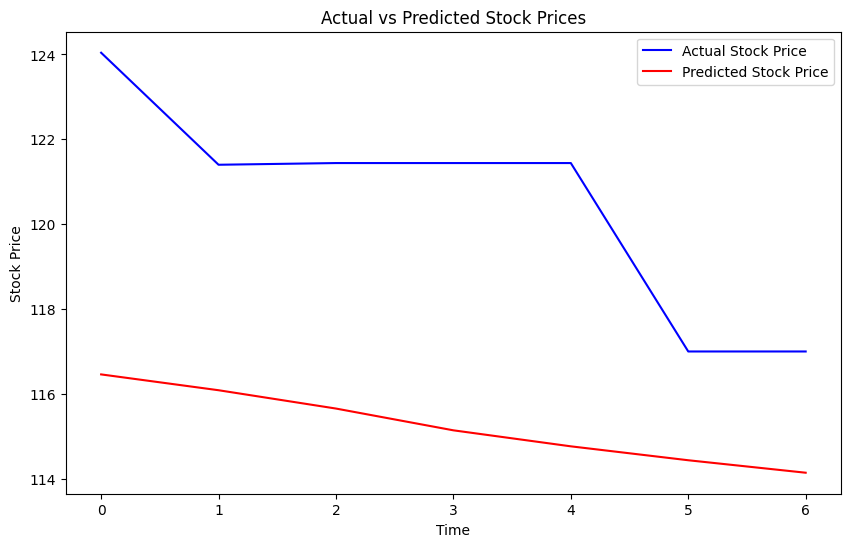

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual prices to get back to original scale
predicted_prices_actual = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for evaluation
mse = np.mean((predicted_prices_actual - y_test_actual) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting the actual vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices_actual, color='red', label='Predicted Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Mean Squared Error (MSE): 31.159095378719027
Root Mean Squared Error (RMSE): 5.582033265640669


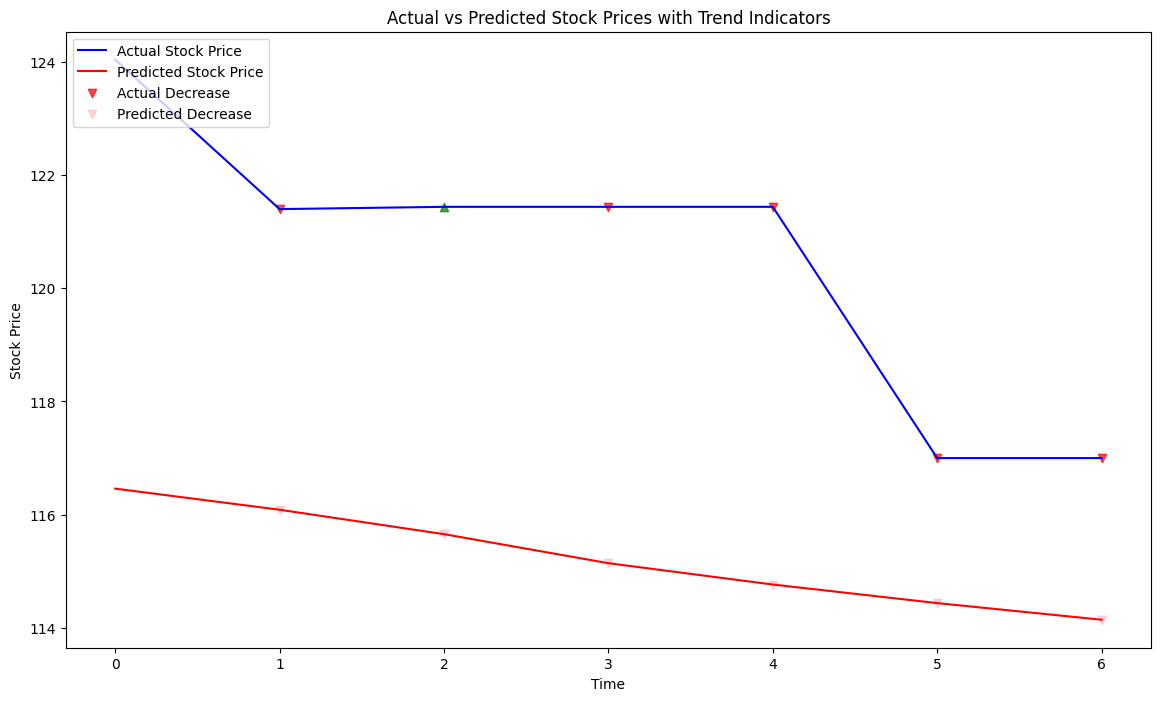

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual prices to get back to the original scale
predicted_prices_actual = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for evaluation
mse = np.mean((predicted_prices_actual - y_test_actual) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Determine whether the stock price is increasing or decreasing for both actual and predicted prices
actual_trend = np.diff(y_test_actual, axis=0)
predicted_trend = np.diff(predicted_prices_actual, axis=0)

# Prepare the plot
plt.figure(figsize=(14, 8))

# Plot actual vs predicted stock prices
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices_actual, color='red', label='Predicted Stock Price')

# Mark increasing and decreasing trends for actual prices
for i in range(1, len(y_test_actual)):
    if actual_trend[i-1] > 0:
        plt.scatter(i, y_test_actual[i], color='green', label='Actual Increase' if i == 1 else "", marker='^', alpha=0.7)
    else:
        plt.scatter(i, y_test_actual[i], color='red', label='Actual Decrease' if i == 1 else "", marker='v', alpha=0.7)

# Mark increasing and decreasing trends for predicted prices
for i in range(1, len(predicted_prices_actual)):
    if predicted_trend[i-1] > 0:
        plt.scatter(i, predicted_prices_actual[i], color='lightgreen', label='Predicted Increase' if i == 1 else "", marker='^', alpha=0.7)
    else:
        plt.scatter(i, predicted_prices_actual[i], color='pink', label='Predicted Decrease' if i == 1 else "", marker='v', alpha=0.7)

# Title and labels
plt.title('Actual vs Predicted Stock Prices with Trend Indicators')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')

# Show the plot
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Mean Squared Error (MSE): 31.159095378719027
Root Mean Squared Error (RMSE): 5.582033265640669


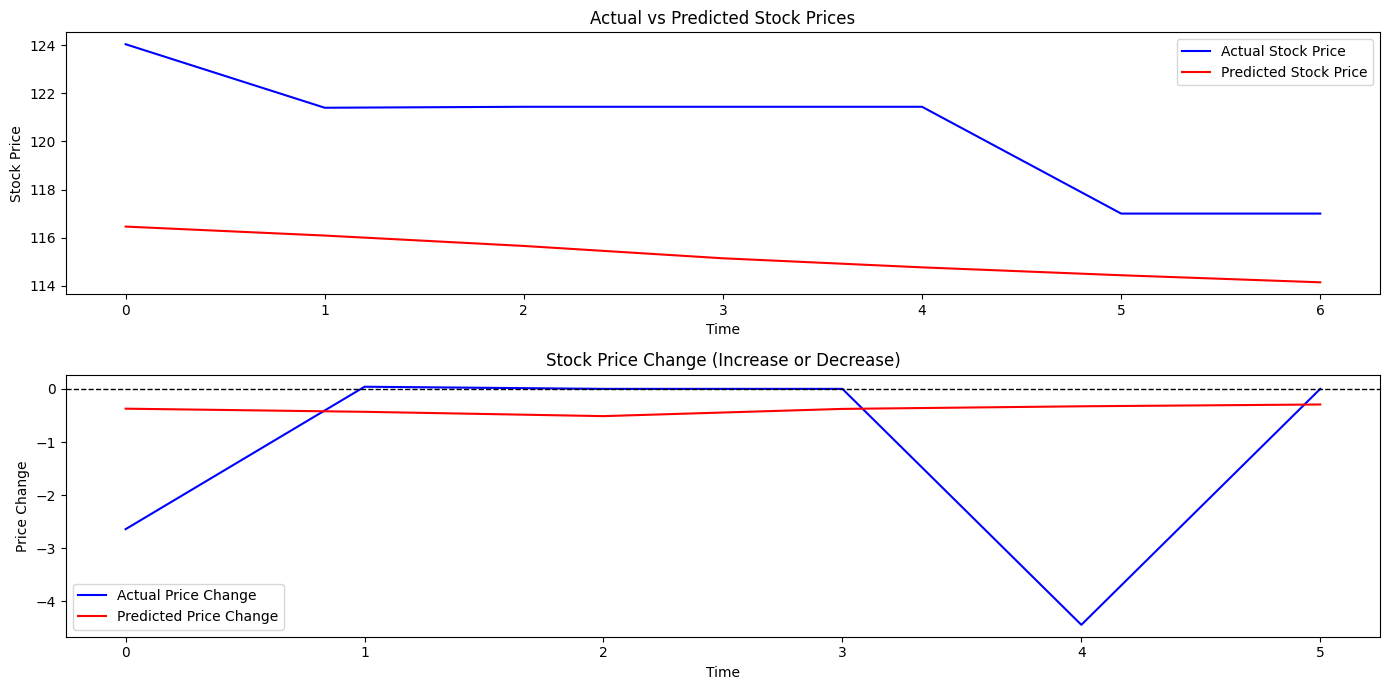

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual prices to get back to original scale
predicted_prices_actual = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = np.mean((predicted_prices_actual - y_test_actual) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Identify if stock price is increasing or decreasing
# Compute differences between consecutive days for both actual and predicted prices
actual_diff = np.diff(y_test_actual, axis=0)
predicted_diff = np.diff(predicted_prices_actual, axis=0)

# Plot the actual vs predicted stock prices
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices_actual, color='red', label='Predicted Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

# Plot the price changes (positive: increasing, negative: decreasing)
plt.subplot(2, 1, 2)
plt.plot(actual_diff, color='blue', label='Actual Price Change')
plt.plot(predicted_diff, color='red', label='Predicted Price Change')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.title('Stock Price Change (Increase or Decrease)')
plt.xlabel('Time')
plt.ylabel('Price Change')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Mean Squared Error (MSE): 31.159095378719027
Root Mean Squared Error (RMSE): 5.582033265640669


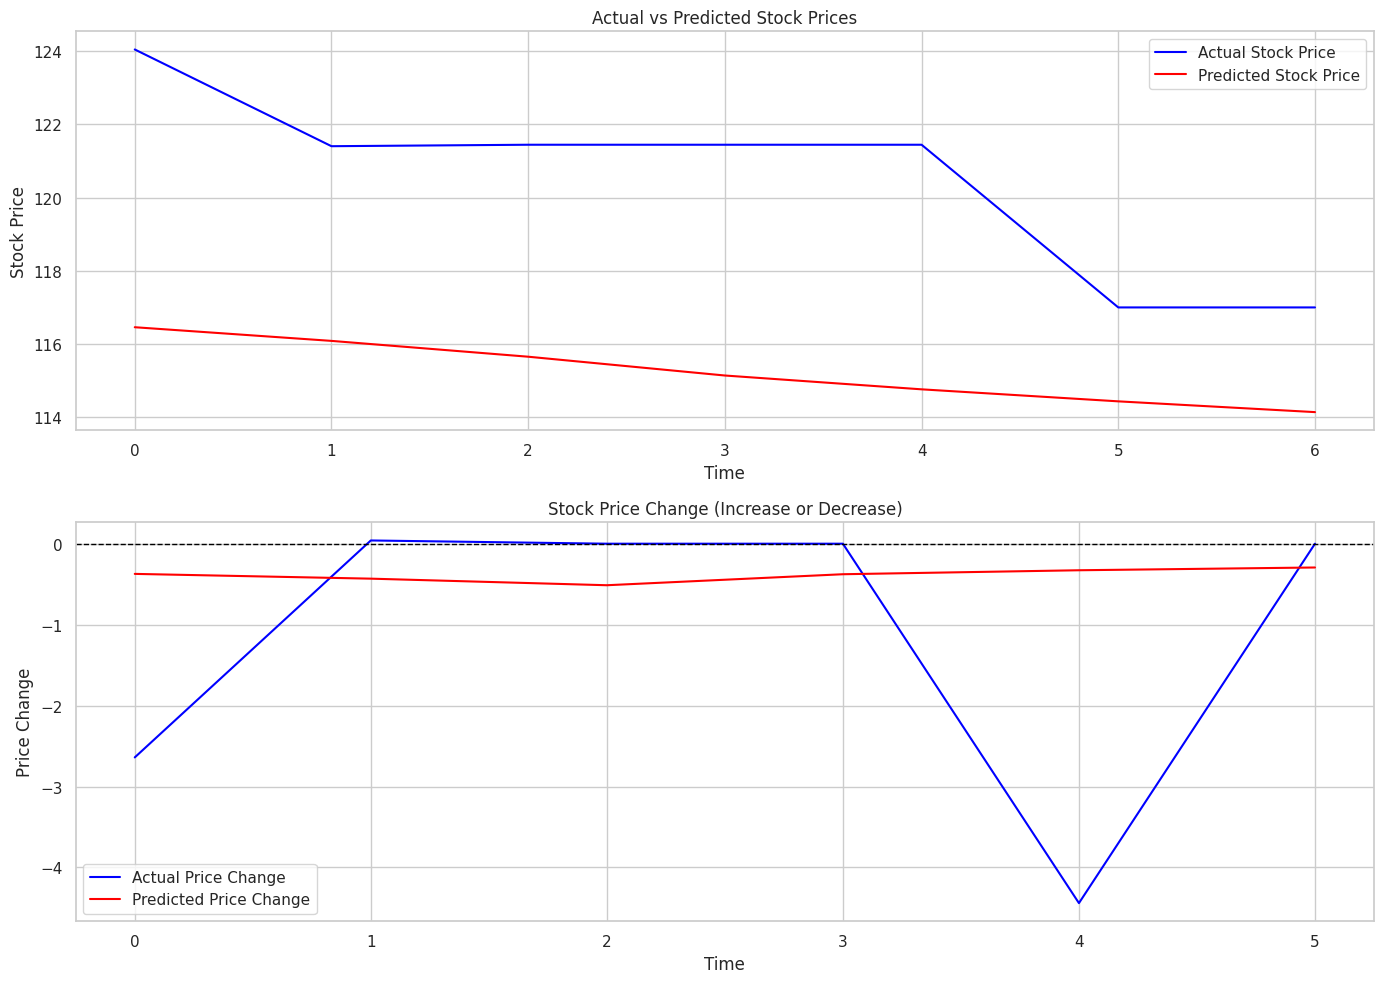

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual prices to get back to original scale
predicted_prices_actual = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = np.mean((predicted_prices_actual - y_test_actual) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Identify if stock price is increasing or decreasing
# Compute differences between consecutive days for both actual and predicted prices
actual_diff = np.diff(y_test_actual, axis=0)
predicted_diff = np.diff(predicted_prices_actual, axis=0)

# Set seaborn style
sns.set(style="whitegrid")

# Create the figure and axes
plt.figure(figsize=(14, 10))

# Plot actual vs predicted stock prices
plt.subplot(2, 1, 1)
sns.lineplot(x=np.arange(len(y_test_actual)), y=y_test_actual.flatten(), color='blue', label='Actual Stock Price')
sns.lineplot(x=np.arange(len(predicted_prices_actual)), y=predicted_prices_actual.flatten(), color='red', label='Predicted Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

# Plot stock price changes (increase or decrease)
plt.subplot(2, 1, 2)
sns.lineplot(x=np.arange(len(actual_diff)), y=actual_diff.flatten(), color='blue', label='Actual Price Change')
sns.lineplot(x=np.arange(len(predicted_diff)), y=predicted_diff.flatten(), color='red', label='Predicted Price Change')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.title('Stock Price Change (Increase or Decrease)')
plt.xlabel('Time')
plt.ylabel('Price Change')
plt.legend()

# Adjust layout for better fit
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Mean Squared Error (MSE): 31.159095378719027
Root Mean Squared Error (RMSE): 5.582033265640669


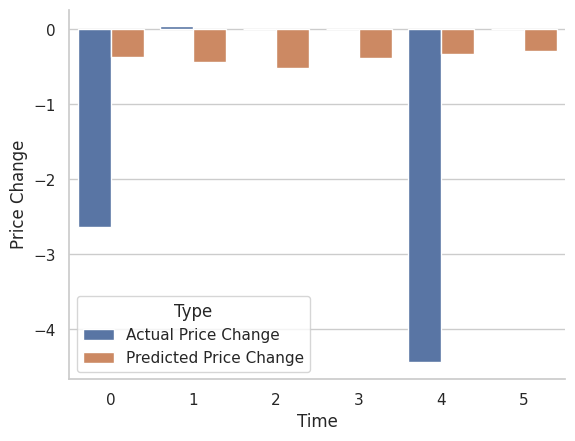

In [14]:
import seaborn as sns
import numpy as np
import pandas as pd

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual prices to get back to original scale
predicted_prices_actual = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = np.mean((predicted_prices_actual - y_test_actual) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Identify if stock price is increasing or decreasing
# Compute differences between consecutive days for both actual and predicted prices
actual_diff = np.diff(y_test_actual, axis=0)
predicted_diff = np.diff(predicted_prices_actual, axis=0)

# Create a DataFrame for easy plotting with seaborn
data = pd.DataFrame({
    'Time': np.arange(len(actual_diff)),
    'Actual Price Change': actual_diff.flatten(),
    'Predicted Price Change': predicted_diff.flatten()
})

# Melt the data to make it long-form for seaborn's barplot
data_melted = pd.melt(data, id_vars='Time', value_vars=['Actual Price Change', 'Predicted Price Change'], 
                      var_name='Type', value_name='Price Change')

# Set seaborn style
sns.set(style="whitegrid")

# Plot the bar graph for stock price changes
sns.barplot(x='Time', y='Price Change', hue='Type', data=data_melted)

# Show the plot
sns.despine()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Mean Squared Error (MSE): 31.159095378719027
Root Mean Squared Error (RMSE): 5.582033265640669


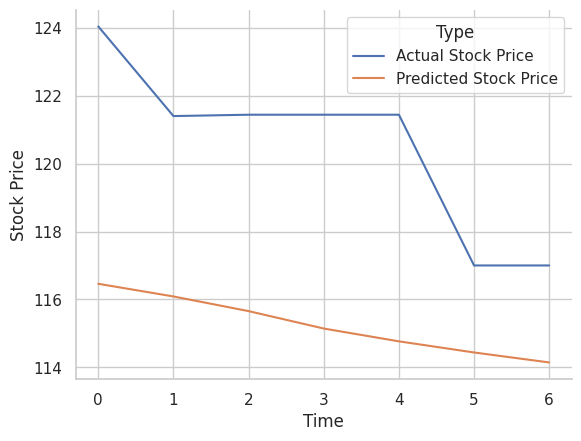

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual prices to get back to original scale
predicted_prices_actual = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = np.mean((predicted_prices_actual - y_test_actual) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Create a DataFrame for actual and predicted prices
data = pd.DataFrame({
    'Time': np.arange(len(y_test_actual)),
    'Actual Stock Price': y_test_actual.flatten(),
    'Predicted Stock Price': predicted_prices_actual.flatten()
})

# Melt the data for easy plotting with seaborn
data_melted = pd.melt(data, id_vars='Time', value_vars=['Actual Stock Price', 'Predicted Stock Price'], 
                      var_name='Type', value_name='Stock Price')

# Set seaborn style
sns.set(style="whitegrid")

# Plot the time series for stock prices
sns.lineplot(x='Time', y='Stock Price', hue='Type', data=data_melted)

# Show the plot
sns.despine()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Mean Squared Error (MSE): 31.159095378719027
Root Mean Squared Error (RMSE): 5.582033265640669


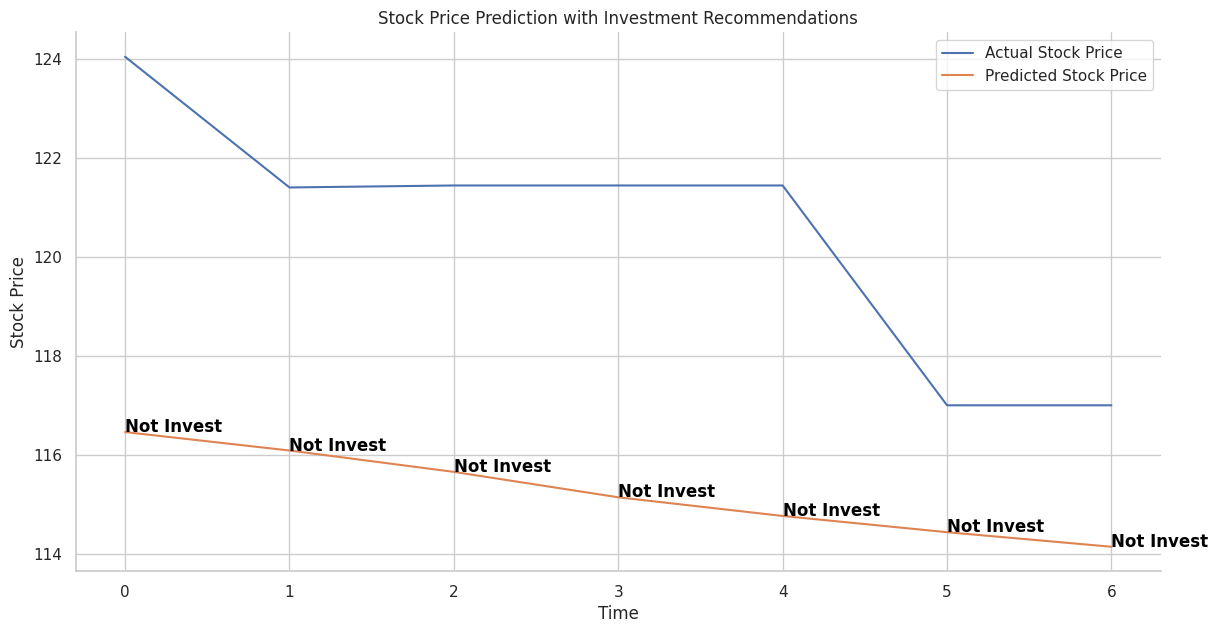

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual prices to get back to original scale
predicted_prices_actual = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = np.mean((predicted_prices_actual - y_test_actual) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Create a DataFrame for actual and predicted prices
data = pd.DataFrame({
    'Time': np.arange(len(y_test_actual)),
    'Actual Stock Price': y_test_actual.flatten(),
    'Predicted Stock Price': predicted_prices_actual.flatten()
})

# Create investment recommendations
data['Investment Recommendation'] = np.where(data['Predicted Stock Price'].shift(-1) > data['Predicted Stock Price'], 
                                             'Invest', 'Not Invest')

# Melt the data for easy plotting with seaborn
data_melted = pd.melt(data, id_vars=['Time', 'Investment Recommendation'], 
                      value_vars=['Actual Stock Price', 'Predicted Stock Price'], 
                      var_name='Type', value_name='Stock Price')

# Set seaborn style
sns.set(style="whitegrid")

# Plot the time series for stock prices
plt.figure(figsize=(14, 7))
sns.lineplot(x='Time', y='Stock Price', hue='Type', data=data_melted)

# Add investment recommendations as annotations
for i in range(len(data)):
    plt.text(data['Time'][i], data['Predicted Stock Price'][i], 
             data['Investment Recommendation'][i], 
             horizontalalignment='left', size='medium', color='black', weight='semibold')

# Show the plot
sns.despine()
plt.title('Stock Price Prediction with Investment Recommendations')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


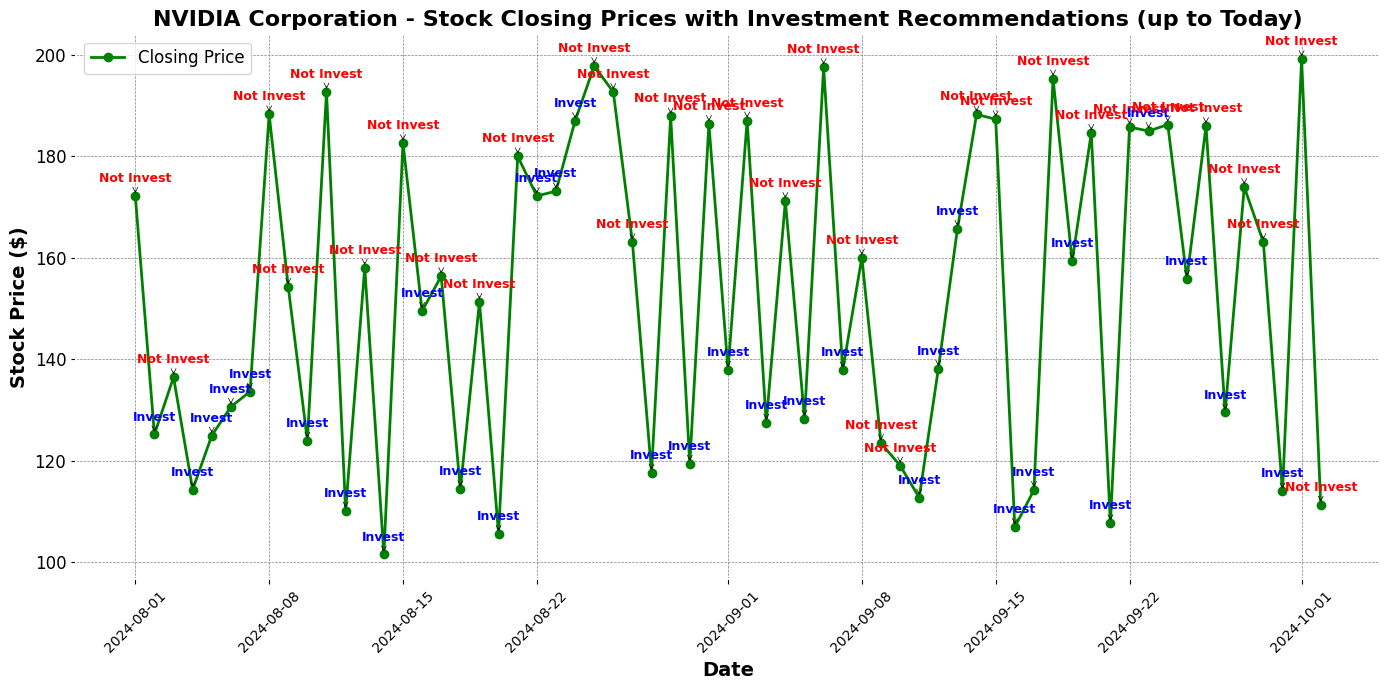

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a date range that includes today
dates = pd.date_range(start='2024-08-01', end=pd.to_datetime('today'), freq='D')
# Generate random closing prices for each date
actual_prices = np.random.uniform(low=100, high=200, size=(len(dates), 1))

# Create a DataFrame
data = pd.DataFrame({
    'Date': dates,
    'Close': actual_prices.flatten()
})

# Define a mapping from stock symbols to company names
stock_symbol = 'NVDA'  # Example stock symbol
company_name_mapping = {
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corporation',
    'GOOGL': 'Alphabet Inc. (Class A)',
    'AMZN': 'Amazon.com, Inc.',
    'FB': 'Meta Platforms, Inc. (Facebook)',
    'TSLA': 'Tesla, Inc.',
    'BRK.B': 'Berkshire Hathaway Inc. (Class B)',
    'NVDA': 'NVIDIA Corporation',
    'JNJ': 'Johnson & Johnson',
    'V': 'Visa Inc.',
    'PG': 'Procter & Gamble Co.',
    'MA': 'Mastercard Incorporated',
    'DIS': 'The Walt Disney Company',
    'PYPL': 'PayPal Holdings, Inc.',
    'NFLX': 'Netflix, Inc.',
    'INTC': 'Intel Corporation',
    'CMCSA': 'Comcast Corporation',
    'T': 'AT&T Inc.',
    'PEP': 'PepsiCo, Inc.',
    'KO': 'The Coca-Cola Company',
    'CSCO': 'Cisco Systems, Inc.',
    'XOM': 'Exxon Mobil Corporation',
    'PFE': 'Pfizer Inc.',
    'MRK': 'Merck & Co., Inc.',
    'CVX': 'Chevron Corporation',
    'NKE': 'NIKE, Inc.',
    'WMT': 'Walmart Inc.',
    'ABT': 'Abbott Laboratories',
    'AMD': 'Advanced Micro Devices, Inc.',
    'ORCL': 'Oracle Corporation',
    'CRM': 'Salesforce.com, Inc.',
    'TMO': 'Thermo Fisher Scientific Inc.',
    'LLY': 'Eli Lilly and Company',
    'COST': 'Costco Wholesale Corporation',
    'MDT': 'Medtronic plc',
    'TXN': 'Texas Instruments Incorporated',
    'IBM': 'International Business Machines Corporation',
    'QCOM': 'Qualcomm Incorporated',
    'SBUX': 'Starbucks Corporation',
    'BA': 'The Boeing Company',
    'HON': 'Honeywell International Inc.',
    'LMT': 'Lockheed Martin Corporation',
    'CAT': 'Caterpillar Inc.',
    'GS': 'The Goldman Sachs Group, Inc.',
    'JPM': 'JPMorgan Chase & Co.',
    'SPGI': 'S&P Global Inc.',
    'AXP': 'American Express Company',
    'C': 'Citigroup Inc.',
    'MS': 'Morgan Stanley',
    'SNAP': 'Snap Inc.',
    'ZM': 'Zoom Video Communications, Inc.',
}

# Get company name from the mapping
company_name = company_name_mapping.get(stock_symbol, 'Unknown Company')

# Create investment recommendations based on future prices
data['Investment Recommendation'] = np.where(data['Close'].shift(-1) > data['Close'], 'Invest', 'Not Invest')

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], marker='o', label='Closing Price', color='green', linewidth=2)

# Annotate recommendations with improved aesthetics
for index, row in data.iterrows():
    plt.annotate(row['Investment Recommendation'], 
                 (row['Date'], row['Close']), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center',
                 fontsize=9,
                 fontweight='bold',
                 color='blue' if row['Investment Recommendation'] == 'Invest' else 'red',
                 arrowprops=dict(arrowstyle='->', color='black', lw=0.5))

# Customize the plot
plt.title(f'{company_name} - Stock Closing Prices with Investment Recommendations (up to Today)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price ($)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()
